# Images in Python

## IAFIG-RMS Bioimage Analysis with Python course

**Monday 2019-12-09 1000--1200**

*... with a coffee break!*

## Aim

To revise key concepts of digital images and make connections to counterpart concepts in Python.

*Note: We will go through a lot of concepts quite quickly in this session. However, you should know all of them and the point of this session is to make links between what you know and introduce you to Python packages and conventions that we will use throughout the course.*

## ILOs

* [x] Describe how NumPy arrays and dtypes relate to features of digital images
* [ ] Be able to read/write multidimensional image stacks to/from NumPy arrays and multi-page TIFF files
* [ ] Be able to subsample your image using NumPy array smart indexing
* [ ] Extract and plot a histogram of a multidimensional image

## Digital Images c.f. NumPy Arrays

### What is a Digital Image?

![Digital images are arrays or matrices of pixels (or voxels) - i.e. numbers.](./assets/digitalimage.png)

* Digital images are arrays or matrices of pixels - i.e. numbers.
* In a greyscale image, each of these numbers in the greyvalue.
* We can navigate an image by using row and column numbers to extract a single pixel value.
* People use two coordinate systems for this: $i$ & $j$ or $x$ and $y$.
* We will use $x$ for rows and $y$ for columns throughout this course. $x=0, y=0$ is the top left corner of the image.

Time: 5 min

### What is a NumPy Array?

In [1]:
import numpy as np

# Create an array of random values between 0 and 8 (exclusive)
# The array has ten rows and fifteen columns

rows = 10
columns = 15
myArray = np.random.randint(8,size=(rows,columns))

display(myArray)

array([[5, 1, 3, 4, 2, 2, 1, 4, 7, 2, 2, 1, 7, 3, 3],
       [5, 2, 2, 7, 2, 6, 1, 5, 0, 3, 0, 7, 5, 7, 7],
       [5, 6, 3, 6, 6, 2, 7, 2, 6, 5, 7, 4, 5, 5, 7],
       [4, 0, 0, 5, 7, 4, 4, 1, 5, 7, 3, 4, 0, 7, 1],
       [0, 4, 3, 3, 6, 4, 6, 4, 4, 4, 2, 6, 2, 2, 6],
       [6, 4, 4, 7, 7, 3, 7, 0, 7, 0, 7, 2, 1, 5, 1],
       [2, 2, 5, 7, 0, 0, 1, 0, 1, 2, 7, 4, 3, 0, 2],
       [4, 0, 5, 0, 1, 0, 1, 2, 1, 2, 2, 7, 5, 2, 4],
       [2, 7, 6, 2, 6, 4, 0, 2, 7, 2, 3, 2, 6, 7, 0],
       [6, 3, 7, 2, 1, 3, 5, 0, 1, 1, 0, 6, 2, 5, 2]])

In [2]:
# Extract the element value at x=5 and y=6

x = 5
y = 4
display(myArray[x,y])

7

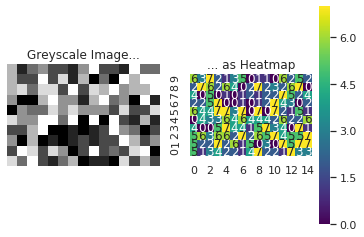

In [3]:
import matplotlib.pyplot as plt
%matplotlib widget
import seaborn as sns; sns.set()

f,axes = plt.subplots(1,2)
(aMPL, aSNS) = axes.flatten()

# Display array as greyscale image
aMPL.imshow(myArray, cmap="gray")  # We discuss colourmaps (cmaps, LUTs) below
aMPL.set_axis_off()  # This turns axes off
aMPL.set_title("Greyscale Image...")

# Display array as heatmap
sns.heatmap(myArray,cmap="viridis",square=True,annot=True,ax=aSNS)
aSNS.set_ylim(0,10)  # Note that x and y are swapped for display
aSNS.set_title("... as Heatmap")

plt.show()

# Note that both of these autoscale (like ImageJ).
# This doesn't affect the underlying array

* In Python, NumPy Arrays are arrays or matrices of numbers, as such we can use arrays to represent digital images.
* For the representation of a greyscale image, we would use an array with as many rows and columns as the each of these numbers in the greyvalue.
* We can navigate an array by using row and column numbers to extract a single element - this is called indexing.
* Don't forget that Python starts counting at $0$ and not at $1$
* As with digital images, we will use $x$ for rows and $y$ for columns throughout this course. $x=0, y=0$ is the top left corner of the array.
* Note: Python and FIJI swap $x$ and $y$, so the data will be transposed.

Time: 5 min

### Colour Digital Images

![Colour images have multiple 'channels.'](./assets/colourimage.png)

* Colour images have multiple 'channels.
* In photography and monitors/screens three such channels represent RGB.
* In microscopy we can have any number of channels, each representing a different spectral band, i.e. a different fluorphore.

Time: 3 min

### 'Colour' NumPy Arrays?

In [4]:
# Create a 3-channel array of random values between 0 and 8 (exclusive)
# The array has ten rows and fifteen columns

rows = 10
columns = 15
channels = 3
myRGBArray = np.random.randint(8,size=(rows,columns,channels))

print("Red:")
display(myRGBArray[:,:,0])

Red:


array([[1, 6, 7, 2, 3, 3, 6, 1, 2, 1, 3, 4, 4, 3, 1],
       [5, 4, 7, 4, 5, 1, 1, 3, 5, 3, 3, 4, 2, 2, 3],
       [6, 3, 3, 3, 1, 4, 0, 4, 3, 7, 0, 2, 5, 0, 6],
       [6, 4, 5, 1, 5, 6, 5, 1, 0, 4, 0, 7, 4, 1, 3],
       [6, 4, 4, 7, 1, 2, 1, 3, 1, 6, 2, 0, 6, 5, 6],
       [7, 1, 0, 2, 1, 2, 7, 3, 5, 7, 2, 0, 7, 7, 6],
       [0, 2, 0, 7, 7, 4, 7, 2, 0, 7, 0, 2, 1, 6, 1],
       [7, 6, 5, 5, 2, 2, 6, 3, 2, 6, 7, 3, 2, 4, 5],
       [6, 3, 2, 3, 5, 2, 6, 7, 5, 7, 4, 5, 3, 1, 5],
       [7, 3, 5, 4, 6, 6, 2, 6, 4, 3, 3, 0, 5, 0, 5]])

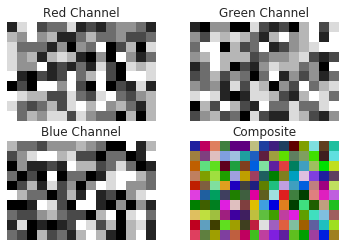

In [5]:
f, axes = plt.subplots(2,2)  # Create four subplots (2x2 grid)
(aR, aG, aB, aRGB) = axes.flatten()

aR.imshow(myRGBArray[:,:,0], cmap="gray")  # Displaying individual channels in grey prevents false highlighting of areas
aR.set_axis_off()
aR.set_title("Red Channel")

aG.imshow(myRGBArray[:,:,1], cmap="gray")
aG.set_axis_off()
aG.set_title("Green Channel")

aB.imshow(myRGBArray[:,:,2], cmap="gray")
aB.set_axis_off()
aB.set_title("Blue Channel")

aRGB.imshow(myRGBArray/8)  # Matlab expects values between 0 and 1 or 0 and 255 (see bit-depth below)
aRGB.set_axis_off()
aRGB.set_title("Composite")

plt.show()

* NumPy arrays can have more than two dimensions ($x$ and $y$).
* If you're doing a lot of computation, it's conventional to represent channels in the first dimension, as this is quicker for access.
* $x$ and $y$ then become the second and third dimensions, respectively.
* However, `matplotlib` expects colour to be the third dimension (and $x$ and $y$ to the be the first and second.
* We will use `matplotlib`'s convention for 2D images with colour channels.

Time: 3 min

### Spatial Sampling (2D)

![The number of pixels in in a image denote the resolution.](./assets/resolution.png)

* The number of pixels in in a image denote the resolution.
* Each pixel will represent a physical size, e.g. $3 \mu m \times 3 \mu m$ (also often call resolution)
* [In a Nyquist sampled system], the pixel size and resolution give you all the necessary information about spatial quantisation in your system.

Time: 3 min

### Intensity Sampling

![The bit-depth of an image describes the dynamic range of a pixel, i.e. the difference between the minimum and maximum pixel values.](./assets/bitdepth.png)

* The bit-depth of an image describes the dynamic range of a pixel, i.e. the difference between the minimum and maximum pixel values.
* Most DSLR cameras will use 8-bit for greyscale images and 3x8-bit (24-bit) for colour images.
* Most scientific cameras will use 12-bit or 16-bit. (Both will appear to be 16-bit due to the holder files.)
* Most video drivers are set to 8-bit and so 8-bit and 16-bit images can appear the same - but, don't panic, the computer can still see all that extra information.
* Up to 16-bit, computers use integers to represent pixel values; however, 32 and 64-bit images will likely use floats (continous numbers with decimal points). Each has its benefits.

Time: 3 min

## Look-Up Tables (LUTs) and Composites

![Pixel values can be visualised with a range of different colours.](./assets/LUTs.png)

* Pixel values can be visualised with a range of different colours.
* The 'mapping' from a greyscale value to a colour is done through a Look-Up Table (LUT)
* It's important to be aware that there are good and bad LUTs - some, like Jet, are not perceptually uniform and will artificially highlight the yellow-red features.

Time: 5 min

![Different channels/colours of an image can be combined to create a composite image.](./assets/composite.png)

* Different channels/colours of an image can be combined to create a composite image.
* We're all used to seeing RGB composite images everyday.
* However, in microscopy, we can choose the LUTs used for independent channels giving us greater flexibility.
* Bear in mind that some colours, e.g. the ubiquitous red-green pairing, are not colourblind friendly.

Time: 3 min

![Bear in  mind that different composite representations can 'trick' us to think different things.](./assets/colourissues.png)

* Bear in  mind that different composite representations can 'trick' us to think different things.
* As such, we should always investigating the underlying data (pixel values or exracted objects).

Time: 2 min

## Spatial Sampling (3D) and Temporal Sampling (+t)

![Python can cope with arryas that have N dimensions.](./assets/multidimensional.jpg)

* Python is able to use arrays of N dimensions.
* In microscopy, we're likely to need up to 6: $x$, $y$, $z$, $t$ and $\lambda$.
* For ccomputational efficiency we will treat the first axis ($0$) for time, the second for $\lambda$, and the remaining three as already described for $z$, $x$ and $y$, in that order.
* You may choose a different dimension order depending on your analysis needs, e.g. if you are treating each channel differently then it make make more sense for $\lambda$ to be the first dimension.
* Tell them about singleton dimensions?

Time: 6 min

## Coffee Break! (Somewhere around here, maybe a little earlier.)

**Task:** During the break...?

Time: 20 min

## Input/Output

*Note: # The image we will use for the rest of this tutorial is from the Broad Bioimage Benchmark Collection data set BBBC0034v1 (https://data.broadinstitute.org/bbbc/; Thirstrup et al. 2018)*

In [13]:
# Run this cell to download and unzip the images we need
# You do not need to understand it, but happy to explain during coffee
import urllib.request
import io
import zipfile
import os
from tqdm import tqdm_notebook, tnrange

url = 'https://data.broadinstitute.org/bbbc/BBBC034/BBBC034_v1_dataset.zip'

with urllib.request.urlopen(url) as response:
    print("Downloading...")
    length = int(response.getheader('content-length'))
    chunk = max(4096, length//100000)
    
    buffer = io.BytesIO()
    size = 0
    for b in tnrange(length//chunk + 1):
        block = response.read(chunk)
        if not block:
            print("Finished reading after {0}% of file.".format(size/length))
        buffer.write(block)
        size = size + len(block)
    print("Finished reading file.")
    
    print("Unzipping... ",end="")
    zf = zipfile.ZipFile(buffer)
    os.makedirs('./assets/bbbc034v1/',exist_ok=True)
    zf.extractall(path='./assets/bbbc034v1')
    print("Complete.")

Downloading...


Finished reading file.
Unzipping... Complete.


In [ ]:
import tifffile as tif

# read individual channels
# combine into one array
# save as multichannel tiff with metadata
# open in FIJI to prove it works

* Chas' notes

Time: 15 min

## Cropping & Subsampling vs. Fancy Indexing

* Chas' notes

Time: 15 min

## Histograms

* Chas' notes

Time: 10 min (Total = 105, i.e. 15 minutes under - perfect)